In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:>

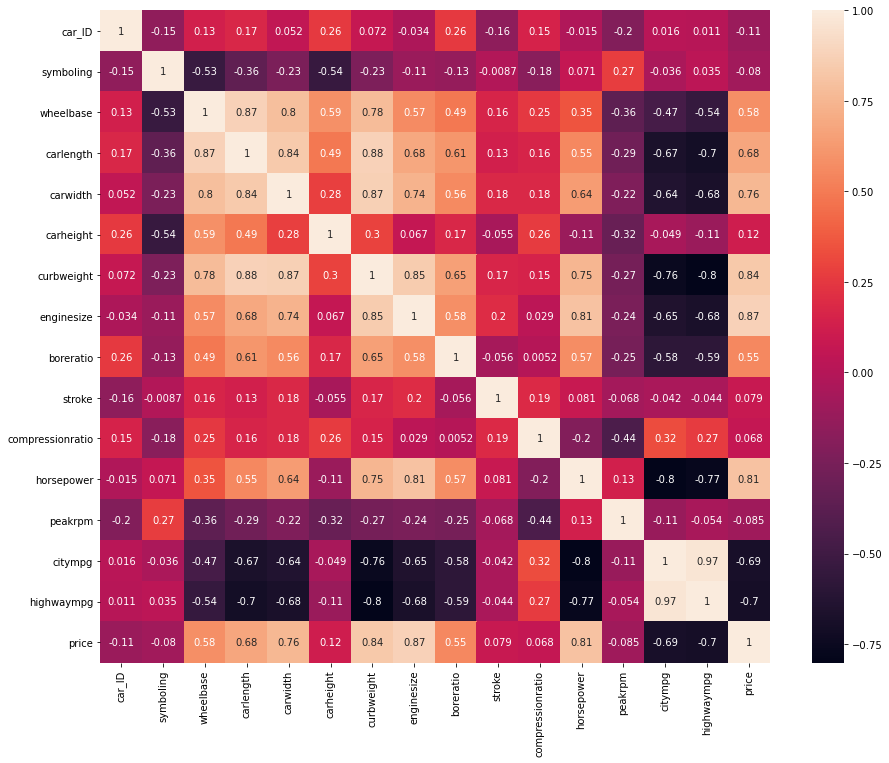

In [5]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [6]:
df['Brand_name']=df['CarName'].apply(lambda x:x.split(' ')[0])

In [7]:
df['Brand_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
def bn(x):
    if x=='maxda':
        x='mazda'
    if x=='Nissan':
        x='nissan'
    if x=='porcshce':
        x='porsche'
    if x=='vokswagen' or x=='vw':
        x='volkswagen'
    if x=='toyouta':
        x='toyota'
    return x

In [9]:
df['Brand_name']=df['Brand_name'].apply(bn)

In [10]:
df['Brand_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Brand_name'],
      dtype='object')

In [12]:
df.drop(['car_ID', 'symboling'],axis=1,inplace=True)

In [13]:
df.drop(['CarName'],axis=1,inplace=True)

In [14]:
df.head(3)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand_name
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero


In [15]:
df=df.drop_duplicates()

In [16]:
df=pd.get_dummies(df,drop_first=True)

In [17]:
df.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Brand_name_nissan,Brand_name_peugeot,Brand_name_plymouth,Brand_name_porsche,Brand_name_renault,Brand_name_saab,Brand_name_subaru,Brand_name_toyota,Brand_name_volkswagen,Brand_name_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X=df.drop(['price'],axis=1)
y=df['price']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=601)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

In [25]:
from sklearn.linear_model import ElasticNetCV

model1=LassoCV(eps=0.001,n_alphas=100,cv=5)

model1.fit(X_train,y_train)

model1.alpha_

In [26]:
model=ElasticNetCV(l1_ratio=[0.1,0.5,0.6,0.8,0.9,0.95,0.99,1],eps=0.001,n_alphas=100,cv=5)

In [27]:
model.fit(X_train,y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.6, 0.8, 0.9, 0.95, 0.99, 1])

In [29]:
test_predict=model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
MAE= mean_absolute_error(test_predict,y_test)

In [32]:
MSE=mean_squared_error(test_predict,y_test)

In [33]:
RMSE=np.sqrt(MSE)

In [34]:
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))

Mean Absolute Error: 1603.3121409192515
Root Mean Squared Error: 1964.274356063634


In [35]:
print("Test Score:" + str(model.score(X_test,y_test)))

Test Score:0.9611277507308056


In [36]:
print("Test Score:" + str(model.score(X_test,y_test)))

Test Score:0.9611277507308056
